<a href="https://colab.research.google.com/github/mudesir/DS-Unit-1-Sprint-2-Statistics/blob/master/Mudesir_DS17_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
### From the raw data we see that the dataset doesn't have column headers and have some missed values lets 
# fix the header and the cell values assigned by "?" clean our data
import pandas as pd
column_headers = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 
                    'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 
                    'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 
                    'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=column_headers)
df.head()               

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


Confidence Intervals : $\bar{X} \mp t(\frac{s}{\sqrt{n}})$

In [2]:
df.shape

(435, 17)

In [3]:
import numpy as np
from scipy import stats

df = df.replace({'y': 1, 'n': 0, '?': np.NaN})
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [4]:
df.isnull().sum()


party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [0]:
df['crime'].dropna(inplace=True)
df['immigration'].dropna(inplace=True)

In [42]:
observed = pd.crosstab(df['crime'], df['immigration'])
observed

immigration,0.0,1.0
crime,,
0.0,94,73
1.0,109,137


In [23]:
data = df['immigration']
data.to_numpy()

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1.

In [0]:
data.dropna(inplace=True)

In [8]:
data.shape

(428,)

In [9]:
data.mean()

0.5046728971962616

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)


In [12]:
confidence_interval(data)

(0.45711551746571655, 0.5046728971962616, 0.5522302769268067)

In [0]:
# using scipy


Graphically (with a plot) represent the confidence interval

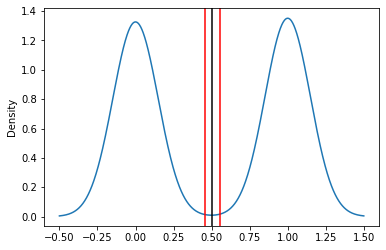

In [25]:
import matplotlib.pyplot as plt
lower, mean, upper = confidence_interval(data)
data.plot.density()
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()

<ErrorbarContainer object of 3 artists>

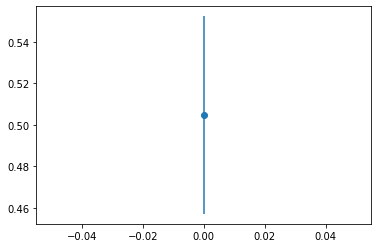

In [26]:
lower, mean, upper = confidence_interval(data)
moe = upper - mean
plt.errorbar(0, mean, yerr=moe, fmt='o')

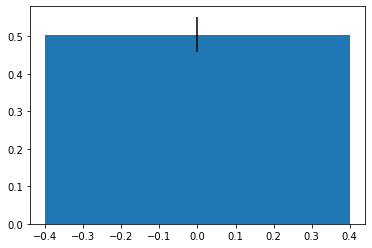

In [27]:
plt.bar(0, mean, yerr=moe)
plt.show()

Interpret the confidence interval - what does it tell you about the data and its distribution?

### The confidence interval does not capture 95% of the data in our sample, it captures the population data.

In [43]:
# chi test with scipy
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("chi2 statistic", chi2)
print("\np value", p_value)
print("\ndegrees of freedom",dof)
print("\nexpected frequencies table \n", expected)

chi2 statistic 5.241485888609663

p value 0.022054429366436274

degrees of freedom 1

expected frequencies table 
 [[ 82.08474576  84.91525424]
 [120.91525424 125.08474576]]


In [26]:
# chi test by numpy 
observed

immigration,0.0,1.0
crime,,
0.0,94,73
1.0,109,137


In [27]:
observed_with_margins = pd.crosstab(df['crime'], df['immigration'] , margins=True)
observed_with_margins

immigration,0.0,1.0,All
crime,,,
0.0,94,73,167
1.0,109,137,246
All,203,210,413


In [34]:
col_totals = observed_with_margins.iloc[0:2, 2:3].values.T[0]

col_totals

array([167, 246])

In [36]:
row_totals = observed_with_margins.iloc[2:3, 0:2].values[0]

row_totals

array([203, 210])

In [47]:
sample_size = observed_with_margins.iloc[2:3, 2:3].values[0]

sample_size

array([413])

In [44]:
203*167/413

82.08474576271186

In [48]:
my_expected = []

for i, row_total in enumerate(row_totals):
  row = []
  for j, column_total in enumerate(col_totals):
    expected_val  = ((column_total*row_total) / sample_size)
    row.append(expected_val)
  my_expected.append(row)

my_expected

[[array([82.08474576]), array([120.91525424])],
 [array([84.91525424]), array([125.08474576])]]

In [39]:
expected

array([[ 82.08474576,  84.91525424],
       [120.91525424, 125.08474576]])

In [50]:

expected = np.array(my_expected).T

expected

array([[[ 82.08474576,  84.91525424],
        [120.91525424, 125.08474576]]])

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
# The democrat didn't vote for crime and immigration at the same proportion this shows that they vote for each case differently.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)